In [1]:
!mamba install logomaker ipywidgets -y -q

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
from typing import Any
import requests as req
import functools
import pandas as pd
import numpy as np
import tqdm.notebook as tqdm
# from Bio import SeqUtils
import logomaker as lm
from logomaker import Glyph
import itertools

# Baselines

![](Bild.png) ![](Bild1.png) 

# Aggregate deltas
delta = reference prediction - masked prediction

In [3]:
res_elim = pd.read_csv('res_elim_full.csv', index_col=False)#.drop(columns=['Unnamed: 0'])
ids = res_elim.groupby('activities.activity_id').count()
# res_elim = res_elim[res_elim['activities.activity_id'].isin(ids[ids['masked_pred'] == 85].index.values)]

In [4]:
res_elim = pd.read_csv('res_elim_new.csv', index_col=False)

<AxesSubplot: >

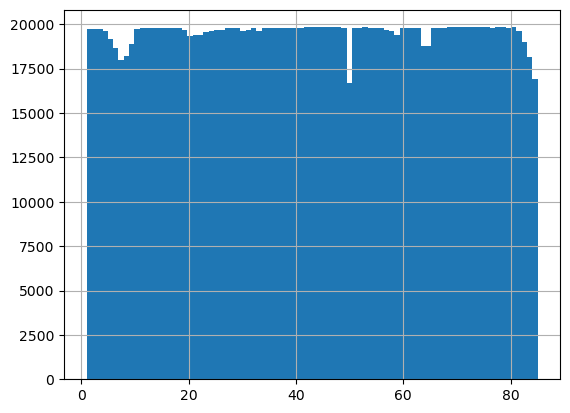

In [5]:
res_elim['masked_residue'].hist(bins=85)

In [6]:
# df = pd.read_csv('../data/snack_box.csv')
# df.head()

In [7]:
# res_elim['rescode'] = [SeqUtils.IUPACData.protein_letters_3to1[a + b] for a, b in zip(res_elim['resname'].str[0].values, res_elim['resname'].str.lower().str[1:].values)]

In [8]:
# res_elim.to_csv('res_elim_85.csv', index=False)

## Deltas over residue positions

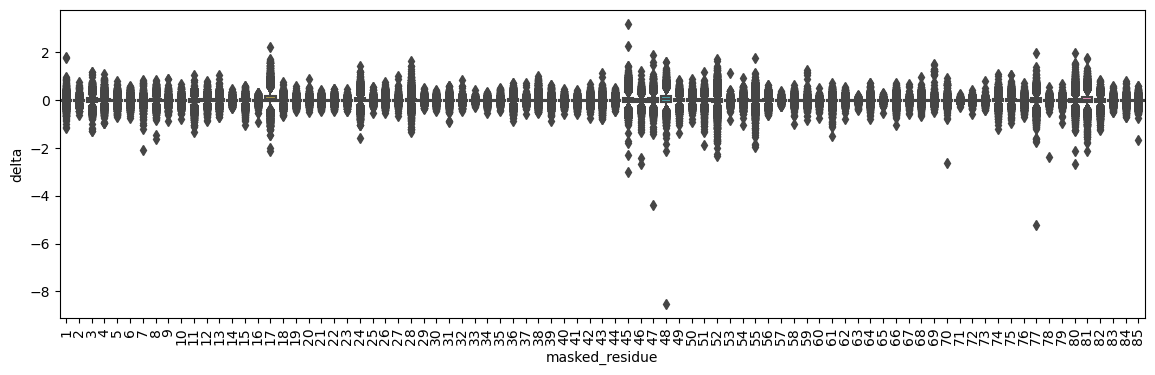

In [9]:
plt.figure(figsize=(14,4))
sns.boxplot(data=res_elim, y='delta', x='masked_residue')
plt.xticks(rotation=90);

## Deltas over residue type

![](residue_interactions.png)

__TODO__: Try finding these effects in the residue masking data?

![](hydogenbonds.png)

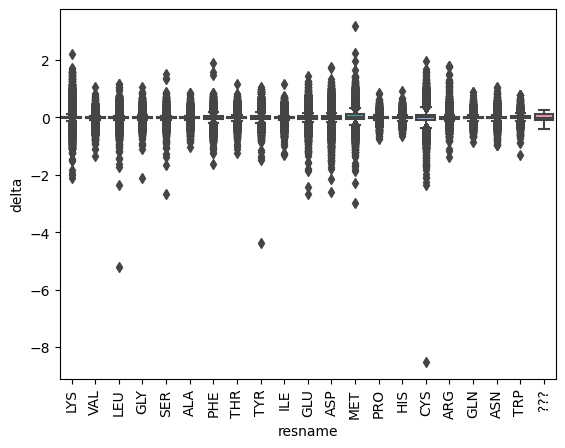

In [10]:
sns.boxplot(res_elim, y='delta', x='resname')
plt.xticks(rotation=90);

In [11]:
res_elim

,activities.activity_id,masked_residue,level_0,ident,masked_pred,resname,rescode,similar.klifs_structure_id,docking.predicted_rmsd,compound_structures.canonical_smiles,docking.chemgauss_score,docking.posit_probability,UniprotID,similar.fp_similarity,index,reference_pred,target,delta,pl_min_dist,ca_min_dist
0,37510,1,974393,10,6.385883,LYS,K,786,1.384550,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,-8.021307,0.75,P00533,0.222222,3882,6.364534,5.096910,-0.021349,8.600200,10.684673
1,37510,2,974397,10,6.425015,VAL,V,786,1.384550,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,-8.021307,0.75,P00533,0.222222,3882,6.364534,5.096910,-0.060481,7.226253,8.347977
2,37510,3,974355,10,6.443994,LEU,L,786,1.384550,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,-8.021307,0.75,P00533,0.222222,3882,6.364534,5.096910,-0.079459,3.839240,4.839041
3,37510,4,974429,10,6.313110,GLY,G,786,1.384550,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,-8.021307,0.75,P00533,0.222222,3882,6.364534,5.096910,0.051424,4.134365,4.134365
4,37510,5,974362,10,6.375696,SER,S,786,1.384550,C/N=N/Nc1ccc2ncnc(N(C)c3ccccc3)c2c1,-8.021307,0.75,P00533,0.222222,3882,6.364534,5.096910,-0.011161,5.990878,7.418410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663364,24970108,81,346733,119711,7.893721,ASP,D,6754,1.135039,Cc1ccc(C(=O)Nc2ccc(CN3CC[NH+](C)CC3)c(C(F)(F)F...,1.130857,0.85,P00519,0.380952,207,7.885062,6.822752,-0.008659,15.009217,17.726716
1663365,24970108,82,346794,119711,7.892075,PHE,F,6754,1.135039,Cc1ccc(C(=O)Nc2ccc(CN3CC[NH+](C)CC3)c(C(F)(F)F...,1.130857,0.85,P00519,0.380952,207,7.885062,6.822752,-0.007013,15.664192,16.912229
1663366,24970108,83,346734,119711,7.878638,GLY,G,6754,1.135039,Cc1ccc(C(=O)Nc2ccc(CN3CC[NH+](C)CC3)c(C(F)(F)F...,1.130857,0.85,P00519,0.380952,207,7.885062,6.822752,0.006424,11.549055,13.548634
1663367,24970108,84,346743,119711,7.884273,LEU,L,6754,1.135039,Cc1ccc(C(=O)Nc2ccc(CN3CC[NH+](C)CC3)c(C(F)(F)F...,1.130857,0.85,P00519,0.380952,207,7.885062,6.822752,0.000789,9.374242,11.544413


In [12]:
res_vars = res_elim.groupby(['masked_residue', 'rescode'])['delta'].agg(['mean', 'count', 'var']).fillna(0)

In [13]:
res_counts = res_vars.pivot_table(index='masked_residue', columns='rescode').fillna(0)

In [14]:
res_counts

count                                                     \
rescode              A       C        D       E        F        G       H   
masked_residue                                                              
1                381.0  1001.0    213.0  2427.0      0.0      6.0   333.0   
2                 25.0   357.0    516.0  2818.0    161.0    334.0    46.0   
3                  0.0    16.0      0.0     2.0    337.0     25.0     0.0   
4                 26.0     0.0     37.0     0.0     10.0  18474.0     0.0   
5                905.0     4.0    524.0  3992.0      0.0    438.0   273.0   
...                ...     ...      ...     ...      ...      ...     ...   
81                 2.0     0.0  19823.0     0.0      0.0      0.0     0.0   
82                 0.0     0.0      2.0     0.0  18720.0      0.0     0.0   
83                 0.0     0.0     12.0     0.0      2.0  18995.0     0.0   
84                34.0     0.0      6.0    75.0    299.0      2.0  1162.0   
85              8273.0  1558.0      0.0     0.0    652.0    902.0     0.0   

                                         ...       var                      \
rescode              I       K        L  ...         N         P         Q   
masked_residue                           ...                                 
1                 42.0  6596.0     50.0  ...  0.000595  0.000671  0.003560   
2                341.0  2221.0   1638.0  ...  0.002730  0.003206  0.004428   
3               6067.0    18.0  12076.0  ...  0.000000  0.000000  0.000000   
4                  8.0     0.0      0.0  ...  0.021463  0.007208  0.000000   
5                  8.0  3210.0    112.0  ...  0.004805  0.003645  0.007329   
...                ...     ...      ...  ...       ...       ...       ...   
81                 0.0     0.0      0.0  ...  0.008751  0.000000  0.000000   
82                 0.0     0.0    482.0  ...  0.000000  0.002883  0.000000   
83                 0.0     0.0      0.0  ...  0.000000  0.000047  0.000000   
84               398.0     0.0  12210.0  ...  0.001491  0.000000  0.000136   
85               122.0     0.0     27.0  ...  0.000000  0.000000  0.000000   

                                                                       \
rescode                R         S         T         V         W    X   
masked_residue                                                          
1               0.022364  0.001371  0.001643  0.000783  0.001070  0.0   
2               0.006978  0.000741  0.003650  0.002026  0.000000  0.0   
3               0.000000  0.000000  0.000000  0.008568  0.000000  0.0   
4               0.000000  0.039855  0.000000  0.000000  0.000000  0.0   
5               0.006606  0.003426  0.005507  0.006941  0.002853  0.0   
...                  ...       ...       ...       ...       ...  ...   
81              0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
82              0.000000  0.000000  0.000000  0.000000  0.008722  0.0   
83              0.000000  0.001783  0.006396  0.000000  0.000000  0.0   
84              0.003361  0.000869  0.004105  0.011931  0.007279  0.0   
85              0.000000  0.003081  0.001761  0.002280  0.000000  0.0   

                          
rescode                Y  
masked_residue            
1               0.001761  
2               0.002679  
3               0.000000  
4               0.000000  
5               0.000000  
...                  ...  
81              0.000000  
82              0.015927  
83              0.000000  
84              0.007778  
85              0.000000  

[85 rows x 63 columns]

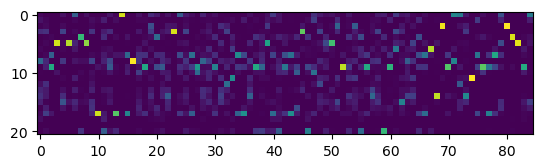

In [15]:
plt.imshow(res_counts['count'].values.T)

In [16]:
@functools.cache
def klifs_ifp_cat():
    resp = req.get('https://klifs.net/api_v2/interactions_get_types')
    resp.raise_for_status()
    return {int(entry['position']) - 1: entry['name'] for entry in resp.json()}

In [17]:
@functools.cache
def klifs_ifp(structure_id):
    try:
        resp = req.get("https://klifs.net/api/interactions_get_IFP", params=dict(structure_ID=structure_id))
        resp.raise_for_status()
        return resp.json()[0]["IFP"]
    except:  # KLIFS inconsistencies...
        return '0' * 85 * 7

In [18]:
def batched(iterable, n, *, strict=False):
    # batched('ABCDEFG', 3) → ABC DEF G
    if n < 1:
        raise ValueError('n must be at least one')
    iterator = iter(iterable)
    while batch := tuple(itertools.islice(iterator, n)):
        if strict and len(batch) != n:
            raise ValueError('batched(): incomplete batch')
        yield batch

In [19]:
@functools.cache
def klifs_ifp_count(structure_id):
    return np.array([int(sum(x != '0' for x in xs)) for xs in batched(klifs_ifp(structure_id), 7)])

def klifs_ifp_numpy(structure_id):
    ifp = klifs_ifp(structure_id)
    return np.array([int(x) for x in ifp])

In [20]:
klifs_counts = [klifs_ifp_count(row['similar.klifs_structure_id'])[row['masked_residue'] - 1] for i, row in tqdm.tqdm(res_elim.iterrows(), total=len(res_elim))]

  0%|          | 0/1663369 [00:00<?, ?it/s]

In [21]:
res_elim['klifs_count'] = klifs_counts

In [21]:
# res_elim.to_csv('res_elim_85.csv', index=False)

In [ ]:
klifs_all = np.sum([klifs_ifp_numpy(x) for x in tqdm.tqdm(res_elim['similar.klifs_structure_id'])], 0)

  0%|          | 0/1663369 [00:00<?, ?it/s]

In [ ]:
interactions = {'residue': list(), 'interaction type': list(), "count": list()}
for i in range(0, len(klifs_all), 7):#enumerate(batched(klifs_all, 7), 1):
    bvec = klifs_all[i:i+7]
    for j, count in enumerate(bvec):
        interactions['residue'].append(i)
        interactions['interaction type'].append(klifs_ifp_cat()[j])
        interactions['count'].append(count)
klifs_interactions = pd.DataFrame(interactions)

In [ ]:
# klifs_hist = sum(klifs_ifp(struc) for struc in tqdm.tqdm(res_elim['similar.klifs_structure_id']))

In [ ]:
# sum interactions
klifs_hist = np.array([ 11135,   1530, 212840, 139315,  65620,  53040,   7905,  53125,
        19295,  15640, 204850,      0,   1445,    255, 207315,  40630,
       229160,   1530,  11645,   1445,   4675,      0,   1190,  62050,
         8500,      0,  15895,  66895,    425,      0,  21760,      0,
            0,      0,  22525, 161925,  10455,  24310,      0,      0,
            0,      0,  74800,  22780, 220405, 171275, 299115, 446845,
        93755,  62305, 145860, 129625,      0,   4590,  59415,   4080,
            0,      0,   3145,     85,  21760,      0,      0,     85,
            0,  20230,   7735,  27285,   5100,   5610,      0,   2210,
            0,  62900,  48025,   2805, 216070,      0,  19295, 176205,
       258740, 106845,  15895,  30855,  14535])
# interaction present
# klifs_hist = np.array([  8500,   1530, 202215, 139060,  65110,  53040,   7735,  37485,
#         19295,  15640, 204850,      0,   1105,    255, 207315,  40630,
#        182240,   1530,  11645,   1445,   4335,      0,   1190,  45645,
#          8500,      0,  15895,  66895,    425,      0,  19210,      0,
#             0,      0,  22525, 160055,  10455,  22440,      0,      0,
#             0,      0,  74800,  22780, 196860, 168385, 197030, 201960,
#         93160,  61965, 145860, 109565,      0,   4505,  45135,   4080,
#             0,      0,   1870,     85,  21760,      0,      0,     85,
#             0,  15045,   4250,  23205,   5100,   5610,      0,   1445,
#             0,  53040,  46410,   2805, 205955,      0,  19295, 171615,
#        170510,  58565,  10795,  26945,  13685])

ValueError: Could not interpret input 'min_ligand_dist'

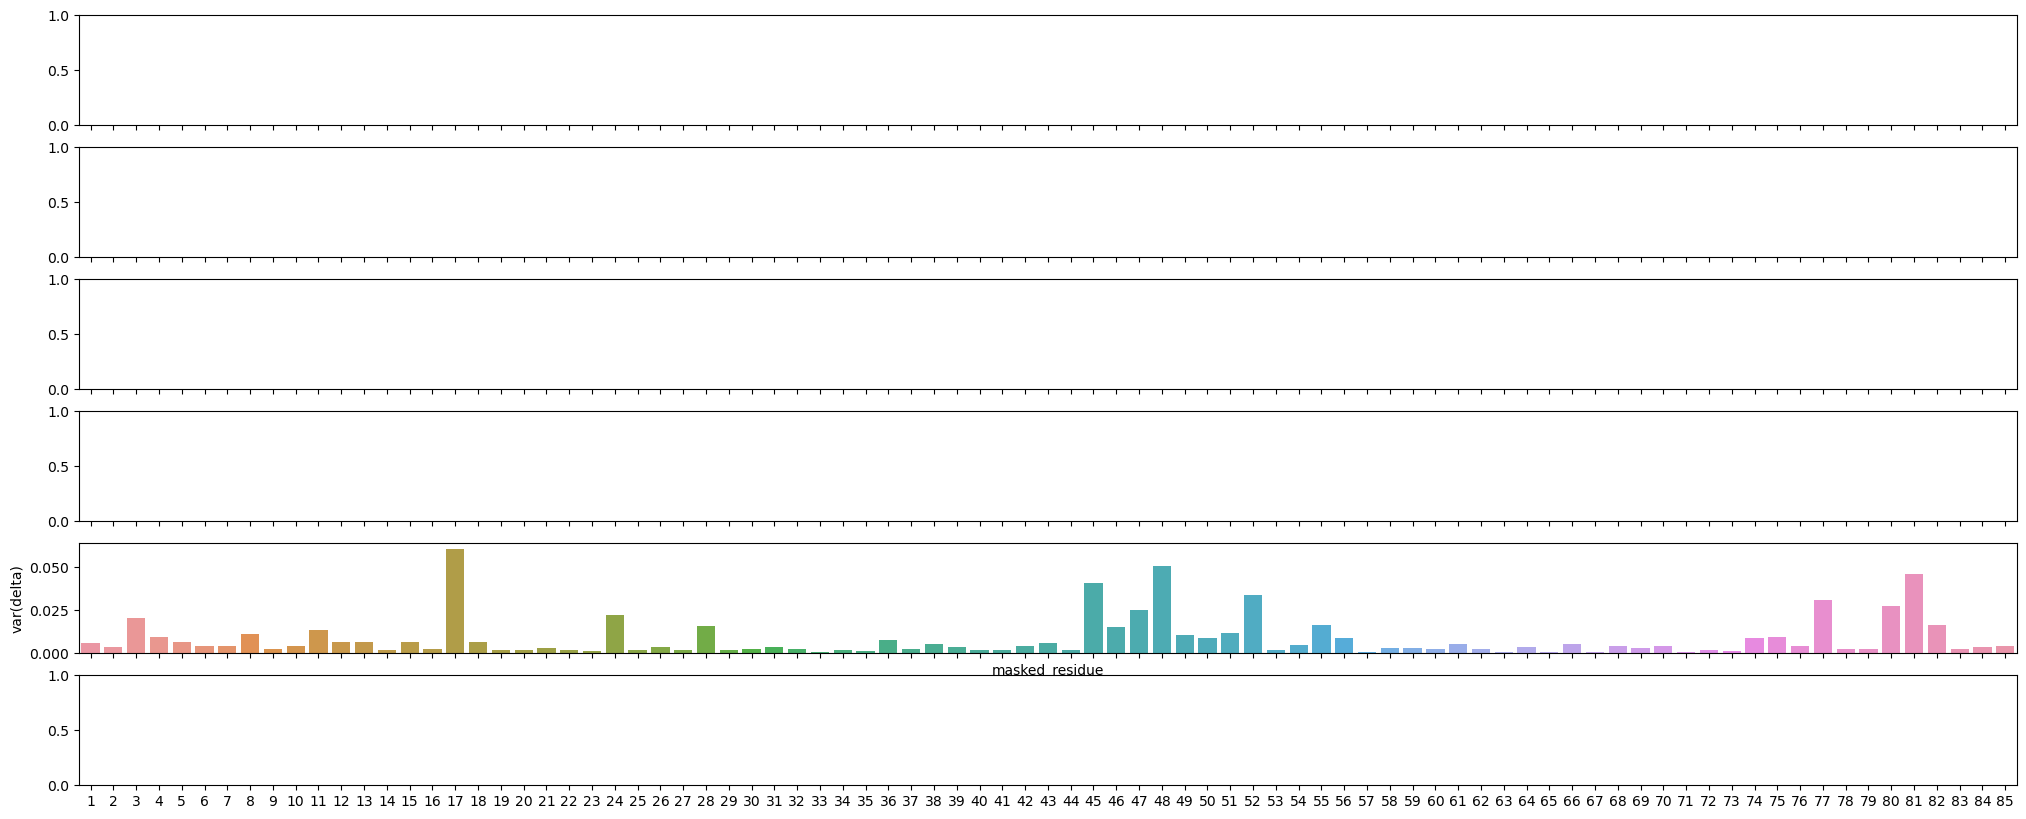

In [22]:
fig, (aaax, aax, ax0, ax, ax1, ax2) = plt.subplots(figsize=(25, 10), nrows=6, sharey=False, sharex=True)


sns.barplot(res_elim.groupby('masked_residue')[['delta']].var().reset_index(), x='masked_residue', y='delta', ax=ax1)
ax1.set_ylabel('var(delta)')

sns.barplot(res_elim, x='masked_residue', y='min_ligand_dist', ax=aaax)

sns.barplot(pd.DataFrame({'klifs hist': klifs_hist / 85, 'residue number': range(1,86)}), x='residue number', y='klifs hist', ax=aax)
# klifs_interactions.pivot_table(index='residue', columns='interaction type', values='count').plot(kind='bar', stacked=True, ax=aax,legend=False)
# plt.legend(title='Interaction Types')


sns.boxplot(data=res_elim, y='delta', x='masked_residue', ax=ax2, flierprops=dict(marker='.', markersize=3))
ax2.plot([-.5,86], [0,0], c='g')
max_var = res_counts['delta', 'var'].max().max()

# max_cnt = res_counts['klifs_count', 'count'].max().max()
# cp = sns.color_palette("Blues", as_cmap=True)
# for position, values in res_counts.iterrows():
#     rescodes = res_counts['delta', 'count'].columns
#     cnt = values['delta', 'count'].sum()
#     floor = 0
#     for rescode in rescodes:
#         height = values['delta', 'count'][rescode] / cnt
#         if height == 0:
#             continue
#         color = cp(values['klifs_count', 'count'][rescode] / max_cnt)[:3]
#         Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=axk, color=color)
#         floor += height
# axk.set_xlim(-0.5, 84.5)
# axk.set_xticks([]); ax.set_yticks([])
# axk.set_ylabel('#KLIFS')

cp = sns.color_palette('vlag', as_cmap=True)#, sep=50, center='light')
max_mean = res_counts['delta', 'mean'].abs().max().max()
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'mean'][rescode] / max_mean  + 0.5)[:3]
        Glyph(c=rescode, p=position-1, ceiling=floor+height, floor=floor, ax=ax0, color=color)
        floor += height
ax0.set_xlim(-0.5, 84.5)
ax0.set_xticks([]); ax0.set_yticks([])
ax0.set_ylabel('mean(delta)')

cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'var'][rescode] / max_var)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=ax, color=color)
        floor += height
ax.set_xlim(-0.5, 84.5)
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('var(delta)')

ax2.set_ylim(-2,2)
ax2.set_xlabel('masked residue')
plt.xticks(np.arange(85));
plt.tight_layout()

In [ ]:
data = res_elim.pivot_table(index=['masked_residue'], columns='klifs_count', values='delta')
plt.imshow(data, aspect=.1, vmin=-0.4, vmax=0.4, cmap=sns.color_palette('vlag', as_cmap=True))
plt.colorbar(); plt.xlabel('#KLIFS interactions')
plt.xticks([0,1,2,3,4]);
# plt.yticks(range(len(data)), data.index);

In [ ]:
data = res_elim.pivot_table(index=['resname'], columns='klifs_count', values='delta')
plt.imshow(data, aspect=1, vmin=-0.4, vmax=0.4, cmap=sns.color_palette('vlag', as_cmap=True))
plt.colorbar(); plt.xlabel('#KLIFS interactions')
plt.xticks([0,1,2,3,4])
plt.yticks(range(len(data)), data.index);

# Split by (non-)active

Split the data into actives and non-actives by thresholding.

In [ ]:
res_elim['reference_pred'].hist(bins=100)
plt.vlines([6,8.5], 0, 10000, color='r')

In [ ]:
res_elim.loc[res_elim['reference_pred'] < 6, 'class_prediction'] = 'less active'

In [ ]:
res_elim.loc[res_elim['reference_pred'] > 8.5, 'class_prediction'] = 'more active'

In [ ]:
res_elim_split = res_elim[~res_elim['class_prediction'].isna()]

## Trends across residue positions

In [ ]:
plt.figure(figsize=(10, 4))
sns.catplot(res_elim_split, y='delta', x='masked_residue', hue='class_prediction', kind='boxen', sharey=True, height=3, aspect=5)
plt.xticks(rotation=90);Unnamed: 0

### Variance across positions

In [ ]:
plt.figure(figsize=(14, 3))
sns.barplot(res_elim_split.groupby('masked_residue')[['delta']].var().reset_index(), x='masked_residue', y='delta')
plt.xticks(rotation=90)
threshold = 0.01
dd = res_elim_split.groupby('masked_residue')[['delta']].var() > threshold
important_residues = dd[dd['delta']].index.values
plt.hlines([threshold], 0, 85, color='r')

In [ ]:
plt.figure(figsize=(10, 4))
sns.catplot(
    res_elim_split[res_elim_split['masked_residue'].isin(important_residues)],
    y='delta', x='masked_residue', hue='class_prediction', kind='strip', row='resname',
    sharey=True, height=3, aspect=5, s=3)

## Trends across residue types

In [ ]:
plt.figure(figsize=(18, 4))
sns.catplot(res_elim_split, y='delta', x='resname', hue='class_prediction', kind='boxen', aspect=3)
# plt.tight_layout()

### Variance across types

In [ ]:
sns.barplot(res_elim_split.groupby('resname')[['delta']].var().reset_index(), x='resname', y='delta')
threshold = 0.02
dd = res_elim_split.groupby('resname')[['delta']].var() > threshold
important_residues = dd[dd['delta']].index
resnames = res_elim_split['resname'].unique()
plt.xticks(ticks=np.arange(len(resnames)), labels=dd.index, rotation=90);
plt.hlines([threshold], 0, len(resnames), color='r')

CYS and MET have an S atom. Maybe the model learns that?

In [ ]:
important_residues

In [ ]:
plt.figure(figsize=(10, 4))
sns.catplot(res_elim[res_elim['resname'].isin(important_residues)], y='delta', x='resname', hue='class_prediction', kind='strip', sharey=True, height=3, aspect=5, s=3)

# Distance-based analysis

Look at the minimal distance between ligand and each residue center.

In [ ]:
sns.scatterplot(res_elim, x='min_ligand_dist', y='delta', hue='class_prediction', s=1)
plt.vlines([3,6], -2, 2, color='r')

In [ ]:
sns.scatterplot(res_elim[res_elim['resname'].isin(important_residues)], x='min_ligand_dist', y='delta', hue='resname', s=1)
# plt.vlines([3,6], -2, 2, color='r')

In [ ]:
sns.scatterplot(res_elim[res_elim['resname'].isin(important_residues)], x='min_ligand_dist', y='delta', hue='resname', s=1)
# plt.vlines([3,6], -2, 2, color='r')

We observe a clear "band" of higher changes below 10. This could be the typical interaction distance?

In [ ]:
res_elim['plausible_distance'] = (res_elim['min_ligand_dist'] < 6) & (res_elim['min_ligand_dist'] > 3)

In [ ]:
sns.kdeplot(res_elim, x='delta', hue='plausible_distance', common_norm=False)
plt.xlim(-.7, .7)
# plt.yscale('log')

# Comparison to general KLIFS properties

## Saltbridge
Residue 17 is associated with higher deltas. This residue plays a role in pocket stability via its possible salt-bridge with residue 24.

In [ ]:
res_elim['saltbridge'] = (res_elim['salt_bridge_17_24'] > 0 ) & (res_elim['salt_bridge_17_24'] < 4)

In [ ]:
sns.kdeplot(res_elim, x='reference_pred', hue='saltbridge', common_norm=True)

Variances across binned salt bridge distances

In [ ]:
res_elim['binned'] = pd.cut(res_elim['salt_bridge_17_24'], bins=50)
bin_variances = res_elim.groupby('binned')['salt_bridge_17_24'].var().reset_index()
bin_variances
sns.barplot(x='binned', y='salt_bridge_17_24', data=bin_variances)
plt.xticks(rotation=90);

I don't see any trends here.

## DFG in and out

In [ ]:
sns.kdeplot(res_elim[res_elim['DFG'].isin(['in', 'out'])], x='reference_pred', hue='DFG', common_norm=False)

No clear trends?

In [ ]:
sns.catplot(res_elim[res_elim['DFG'].isin(['in', 'out']) & res_elim['masked_residue'].isin(range(80, 84))],
            y='delta',
            x='masked_residue',
            hue='class_prediction',
            row='DFG',
            kind='boxen', sharey=True)

## AC helix

Nothing to see here.

In [ ]:
sns.kdeplot(res_elim[res_elim['ac_helix'] != 'na'], x='reference_pred', hue='ac_helix', common_norm=False)

## PLIP interactions

In [38]:
res_elim.set_index(['activities.activity_id', 'masked_residue'], inplace=True)

In [39]:
res_elim['plip'] = [list() for _ in range(len(res_elim))]

In [47]:
res_elim.loc[348976].loc[49]

level_0                                                             1084171
ident                                                                   882
masked_pred                                                        6.523121
resname                                                                 SER
rescode                                                                   S
similar.klifs_structure_id                                            10777
docking.predicted_rmsd                                              1.56838
compound_structures.canonical_smiles    Ic1nc(NCc2ccccc2)c2ncn(C3CCCC3)c2n1
docking.chemgauss_score                                          -12.681108
docking.posit_probability                                              0.72
UniprotID                                                            P06493
similar.fp_similarity                                               0.20354
index                                                                  1106
reference_pr

In [49]:
for ident in tqdm.tqdm(res_elim.reset_index()['activities.activity_id'].unique()):
    try:
        plip = pd.read_csv(f'../data/interaction_analysis/{ident}.csv')
    except:
        continue
    for _, row in plip.iterrows():
        try:
            if res_elim.loc[(ident, row['residue'])] is None:
                res_elim.loc[(ident, row['residue']), 'plip'] = list()
            res_elim.loc[(ident, row['residue']), 'plip'].append(row['interaction_type'])
        except KeyError:
            print(ident)

  0%|          | 0/19832 [00:00<?, ?it/s]

348976
484889
484893
490678
500049
509905
600444
1179483
1405023
1405141
1405147
1405157
1414225
1414227
1414231
1414235
1421879
1421885
1421993
1421996
1422403
1422403
1425299
1459757
1459759
1459760
1459910
1462511
1463631
1463765
1516766
1516782
1516787
1516789
1516791
1516900
1516904
1517039
1517045
1519011
1609096
1609096
1609096
1609148
1609148
1609148
1609213
1609213
1609213
1609241
1609241
1609241
1662258
1693476
1693552
1705402
1752734
1753647
1753647
1753651
1753651
1753651
1765177
1765182
1765189
1815089
1815137
1815141
1815145
1815150
1815275
1815275
1815275
1916252
1916254
1922383
1926634
1926634
1926637
1926649
1926649
1926649
1926826
1926826
1926826
1926826
1961015
2011584
2011584
2021658
2021658
2021662
2021662
2021663
2021663
2021665
2021665
2021665
2021665
2025923
2025929
2025930
2025933
2025933
2025934
2025939
2025941
2025942
2034904
2043705
2043716
2045561
2049750
2049752
2049753
2049755
2049757
2049760
2049762
2049769
2049770
2049774
2080245
2080247
2080266
2080267

In [ ]:
res_elim.reset_index(inplace=True)

In [ ]:
res_elim['#plip'] = res_elim['plip'].map(len)

In [ ]:
res_vars = res_elim.groupby(['masked_residue', 'rescode'])[['delta', 'klifs_count', '#plip']].agg(['mean', 'count', 'var']).fillna(0)

In [ ]:
res_counts = res_vars.pivot_table(index='masked_residue', columns='rescode').fillna(0)

In [ ]:
aggd = res_elim.groupby('masked_residue')[['min_ligand_dist', '#plip', 'delta', 'klifs_count']].agg(['mean', 'var'])
scat_dat = pd.DataFrame({
    'residue': range(1, 86),
    'ligand dist': aggd['min_ligand_dist', 'mean'].values,
    'PLIP count': aggd['#plip', 'mean'].values,
    'KLIFS count': aggd['klifs_count', 'mean'].values,
    'Var(delta)': aggd['delta', 'var'].values,
}).set_index('residue')
g = sns.pairplot(scat_dat, diag_kind="kde", plot_kws=dict(marker="+", linewidth=1))
g.map_lower(sns.kdeplot, levels=4,  fill=True, color=sns.color_palette()[0])

In [ ]:
fig, (aaax, plipax, plipax2, aax, axk, ax0, ax, ax1, ax2) = plt.subplots(figsize=(25, 17), nrows=9, sharey=False, sharex=True)


sns.barplot(res_elim_split.groupby('masked_residue')[['delta']].var().reset_index(), x='masked_residue', y='delta', ax=ax1)
ax1.set_ylabel('var(delta)')

sns.barplot(res_elim, x='masked_residue', y='min_ligand_dist', ax=aaax, errorbar=None)

sns.barplot(res_elim, x='masked_residue', y='#plip', ax=plipax, errorbar=None)

max_cnt = res_counts['#plip', 'mean'].max().max()
cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['#plip', 'mean'][rescode] / max_cnt)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=axk, color=color)
        floor += height
axk.set_xlim(-0.5, 84.5)
axk.set_xticks([]); ax.set_yticks([])
axk.set_ylabel('#PLIP')

sns.barplot(pd.DataFrame({'klifs hist': klifs_hist / len(res_elim), 'residue number': range(1,86)}), x='residue number', y='klifs hist', ax=aax)
# klifs_interactions.pivot_table(index='residue', columns='interaction type', values='count').plot(kind='bar', stacked=True, ax=aax,legend=False)
# plt.legend(title='Interaction Types')


sns.boxplot(data=res_elim, y='delta', x='masked_residue', ax=ax2, flierprops=dict(marker='.', markersize=3), whis=(0,100))
ax2.plot([-.5,86], [0,0], c='g')
max_var = res_counts['delta', 'var'].max().max()

max_cnt = res_counts['klifs_count', 'mean'].max().max()
cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['klifs_count', 'mean'][rescode] / max_cnt)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=plipax2, color=color)
        floor += height
axk.set_xlim(-0.5, 84.5)
axk.set_xticks([]); ax.set_yticks([])
axk.set_ylabel('#KLIFS')

cp = sns.color_palette('vlag', as_cmap=True)#, sep=50, center='light')
max_mean = res_counts['delta', 'mean'].abs().max().max()
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'mean'][rescode] / max_mean  + 0.5)[:3]
        Glyph(c=rescode, p=position-1, ceiling=floor+height, floor=floor, ax=ax0, color=color)
        floor += height
ax0.set_xlim(-0.5, 84.5)
ax0.set_xticks([]); ax0.set_yticks([])
ax0.set_ylabel('mean(delta)')

cp = sns.color_palette("Blues", as_cmap=True)
for position, values in res_counts.iterrows():
    rescodes = res_counts['delta', 'count'].columns
    cnt = values['delta', 'count'].sum()
    floor = 0
    for rescode in rescodes:
        height = values['delta', 'count'][rescode] / cnt
        if height == 0:
            continue
        color = cp(values['delta', 'var'][rescode] / max_var)[:3]
        Glyph(c=rescode, p=position -1, ceiling=floor+height, floor=floor, ax=ax, color=color)
        floor += height
ax.set_xlim(-0.5, 84.5)
ax.set_xticks([]); ax.set_yticks([])
ax.set_ylabel('var(delta)')General remarks

Follow the existing pattern in naming posts after their date, i.e. YYYY-MM-DD-title.md.

Static data such as pictures or tools for download are located in assets/{img,data}.


ax2.set_ylim(-2,2)
ax2.set_xlabel('masked residue')
plt.xticks(np.arange(85));
plt.tight_layout()

plt.savefig('fullhouse.pdf')